##📌 EXTRAÇÃO

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

"""
Para acessar o dataset do ultimo challenge Usei o link do arquivo raw no github,
a fim de facilitar a visualização utilização do projeto. Em ambiente de produção
esse arquivo seria confidencial e seria acessado seguindo padrões de segurança.
"""
url = 'https://raw.githubusercontent.com/LucasEstevesCosta/Challenge-Telecom-X-Analise-de-evasao-de-clientes-Parte-2/refs/heads/main/clientes_telecom_x.csv'
df = pd.read_csv(url)
df.head()

,id_cliente,evasao,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_internet,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_digital,metodo_pagamento,contas_diarias,cobranca_mensal,cobranca_total
0,0002-orfbo,nao,mulher,nao,sim,sim,9,sim,nao,dsl,...,nao,sim,sim,nao,anual,sim,cheque correios,2.20,65.6,593.30
1,0003-mknfe,nao,homem,nao,nao,nao,9,sim,sim,dsl,...,nao,nao,nao,sim,mensal,nao,cheque correios,2.01,59.9,542.40
2,0004-tlhlj,sim,homem,nao,nao,nao,4,sim,nao,fibra otica,...,sim,nao,nao,nao,mensal,sim,cheque eletronico,2.34,73.9,280.85
3,0011-igkff,sim,homem,sim,sim,nao,13,sim,nao,fibra otica,...,sim,nao,sim,sim,mensal,sim,cheque eletronico,3.17,98.0,1237.85
4,0013-exchz,sim,mulher,sim,sim,nao,3,sim,nao,fibra otica,...,nao,sim,sim,nao,mensal,sim,cheque correios,2.97,83.9,267.40


In [35]:
# Verifica as colunas disponíveis
df.columns

Index(['id_cliente', 'evasao', 'genero', 'idoso', 'parceiro', 'dependentes',
       'meses_contrato', 'servico_telefone', 'multiplas_linhas',
       'servico_internet', 'protecao_online', 'backup_online',
       'protecao_dispositivo', 'suporte_tecnico', 'tv_streaming',
       'filmes_streaming', 'tipo_contrato', 'fatura_digital',
       'metodo_pagamento', 'contas_diarias', 'cobranca_mensal',
       'cobranca_total'],
      dtype='object')

In [36]:
# Verifica a estrutura geral
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            7043 non-null   object 
 1   evasao                7043 non-null   object 
 2   genero                7043 non-null   object 
 3   idoso                 7043 non-null   object 
 4   parceiro              7043 non-null   object 
 5   dependentes           7043 non-null   object 
 6   meses_contrato        7043 non-null   int64  
 7   servico_telefone      7043 non-null   object 
 8   multiplas_linhas      7043 non-null   object 
 9   servico_internet      7043 non-null   object 
 10  protecao_online       7043 non-null   object 
 11  backup_online         7043 non-null   object 
 12  protecao_dispositivo  7043 non-null   object 
 13  suporte_tecnico       7043 non-null   object 
 14  tv_streaming          7043 non-null   object 
 15  filmes_streaming     

In [37]:
# Verifica colunas categoricas
df.describe(include='O')

,id_cliente,evasao,genero,idoso,parceiro,dependentes,servico_telefone,multiplas_linhas,servico_internet,protecao_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_digital,metodo_pagamento
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-hotoh,nao,homem,nao,nao,nao,sim,nao,fibra otica,nao,nao,nao,nao,nao,nao,mensal,sim,cheque eletronico
freq,1,5174,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [38]:
# Verifica valores ausentes
df.isna().sum()

,0
id_cliente,0
evasao,0
genero,0
idoso,0
parceiro,0
dependentes,0
meses_contrato,0
servico_telefone,0
multiplas_linhas,0
servico_internet,0


##🛠️ Preparação dos Dados

### Removendo colunas desncessárias

In [39]:
# Remove a coluna 'id_cliente' pois não têm valor preditivo
df = df.drop(columns=['id_cliente'])

In [40]:
df.head(5)

,evasao,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_internet,protecao_online,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_digital,metodo_pagamento,contas_diarias,cobranca_mensal,cobranca_total
0,nao,mulher,nao,sim,sim,9,sim,nao,dsl,nao,...,nao,sim,sim,nao,anual,sim,cheque correios,2.20,65.6,593.30
1,nao,homem,nao,nao,nao,9,sim,sim,dsl,nao,...,nao,nao,nao,sim,mensal,nao,cheque correios,2.01,59.9,542.40
2,sim,homem,nao,nao,nao,4,sim,nao,fibra otica,nao,...,sim,nao,nao,nao,mensal,sim,cheque eletronico,2.34,73.9,280.85
3,sim,homem,sim,sim,nao,13,sim,nao,fibra otica,nao,...,sim,nao,sim,sim,mensal,sim,cheque eletronico,3.17,98.0,1237.85
4,sim,mulher,sim,sim,nao,3,sim,nao,fibra otica,nao,...,nao,sim,sim,nao,mensal,sim,cheque correios,2.97,83.9,267.40


A coluna 'id_cliente' foi removida pois não têm valor preditivo.

In [41]:
df['metodo_pagamento'] = df['metodo_pagamento'].replace({
    'cheque eletronico': 'boleto eletronico',
    'cheque correios': 'boleto correios'})

Substitui 'cheque correios' por 'boleto eletronico' e 'cheque correios' por 'boleto correios' a fim de facilitar a compreensão das variáveis.

### One Hot Encoding

In [42]:
# Fazendo uma cópia do DataFrame
df_clean = df.copy()

In [43]:
# Separa variável as colunas categóricas
colunas_categoricas = df_clean.select_dtypes(include=['object']).columns
colunas_categoricas

Index(['evasao', 'genero', 'idoso', 'parceiro', 'dependentes',
       'servico_telefone', 'multiplas_linhas', 'servico_internet',
       'protecao_online', 'backup_online', 'protecao_dispositivo',
       'suporte_tecnico', 'tv_streaming', 'filmes_streaming', 'tipo_contrato',
       'fatura_digital', 'metodo_pagamento'],
      dtype='object')

Como encontramos colinearidade nas colunas de serviço de internet, mais especificamente entre as categorias 'nao' e 'sem internet', vamos agrupar essas duas categorias. Esse tratamento foi escolhido visto que a informação de que o cliente tem ou não serviço de internet está presente na coluna 'servico_internet'.

In [44]:
# Colunas que vamos fazer o agrupamento das categorias 'nao' e 'sem internet'
colunas_para_tratar = ['protecao_online', 'backup_online', 'protecao_dispositivo',
                      'suporte_tecnico', 'tv_streaming', 'filmes_streaming']

# Agrupar 'nao' e 'sem internet'
for coluna in colunas_para_tratar:
    df_clean[coluna] = df_clean[coluna].replace({'sem internet': 'nao'})

In [45]:
df_clean.describe(include='O')

,evasao,genero,idoso,parceiro,dependentes,servico_telefone,multiplas_linhas,servico_internet,protecao_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_digital,metodo_pagamento
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,2,3,3,2,2,2,2,2,2,3,2,4
top,nao,homem,nao,nao,nao,sim,nao,fibra otica,nao,nao,nao,nao,nao,nao,mensal,sim,boleto eletronico
freq,5174,3555,5901,3641,4933,6361,3390,3096,5024,4614,4621,4999,4336,4311,3875,4171,2365


#### Encoding com OneHotEncoder da biblioteca Scikit Learn

Criando o Encoder com OneHotEncoder do Scikit Learn

In [46]:
# Realiza o encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Inicializa o encoder
one_hot_encoder = make_column_transformer(
    (OneHotEncoder(drop='first', handle_unknown='ignore'), colunas_categoricas),
    remainder='passthrough'
)

In [47]:
# Treina o one_hot_encoder e ajustando os dados
df_encoded = one_hot_encoder.fit_transform(df_clean)
df_encoded = pd.DataFrame(df_encoded, columns=one_hot_encoder.get_feature_names_out())

In [48]:
# Renomea as colunas para remover os prefixos inseridos pelo OneHotEncoder
df_encoded.columns = df_encoded.columns.str.replace('onehotencoder__', '').str.replace('remainder__', '')

#### Checando alterações

In [49]:
df_encoded.head()

,evasao_sim,genero_mulher,idoso_sim,parceiro_sim,dependentes_sim,servico_telefone_sim,multiplas_linhas_sem telefone,multiplas_linhas_sim,servico_internet_fibra otica,servico_internet_nao,...,tipo_contrato_bienal,tipo_contrato_mensal,fatura_digital_sim,metodo_pagamento_boleto eletronico,metodo_pagamento_cartao credito automatico,metodo_pagamento_transferencia automatica,meses_contrato,contas_diarias,cobranca_mensal,cobranca_total
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,9.0,2.20,65.6,593.30
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,9.0,2.01,59.9,542.40
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,4.0,2.34,73.9,280.85
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,13.0,3.17,98.0,1237.85
4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,3.0,2.97,83.9,267.40


In [50]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   evasao_sim                                  7043 non-null   float64
 1   genero_mulher                               7043 non-null   float64
 2   idoso_sim                                   7043 non-null   float64
 3   parceiro_sim                                7043 non-null   float64
 4   dependentes_sim                             7043 non-null   float64
 5   servico_telefone_sim                        7043 non-null   float64
 6   multiplas_linhas_sem telefone               7043 non-null   float64
 7   multiplas_linhas_sim                        7043 non-null   float64
 8   servico_internet_fibra otica                7043 non-null   float64
 9   servico_internet_nao                        7043 non-null   float64
 10  protecao_onl

In [51]:
# Verifica 'contas_diarias' onde vimos a existência fr valores nulos com info()
print(df_encoded['contas_diarias'].isnull().sum())

11


In [52]:
# Remove linhas com valores nulos nas colunas especificadas
df_encoded = df_encoded.dropna(subset=['contas_diarias'])

Foram encontrados 11 NaN que foram tratados com a remoção dos registros.

### ≡ Correlação entre as variáveis

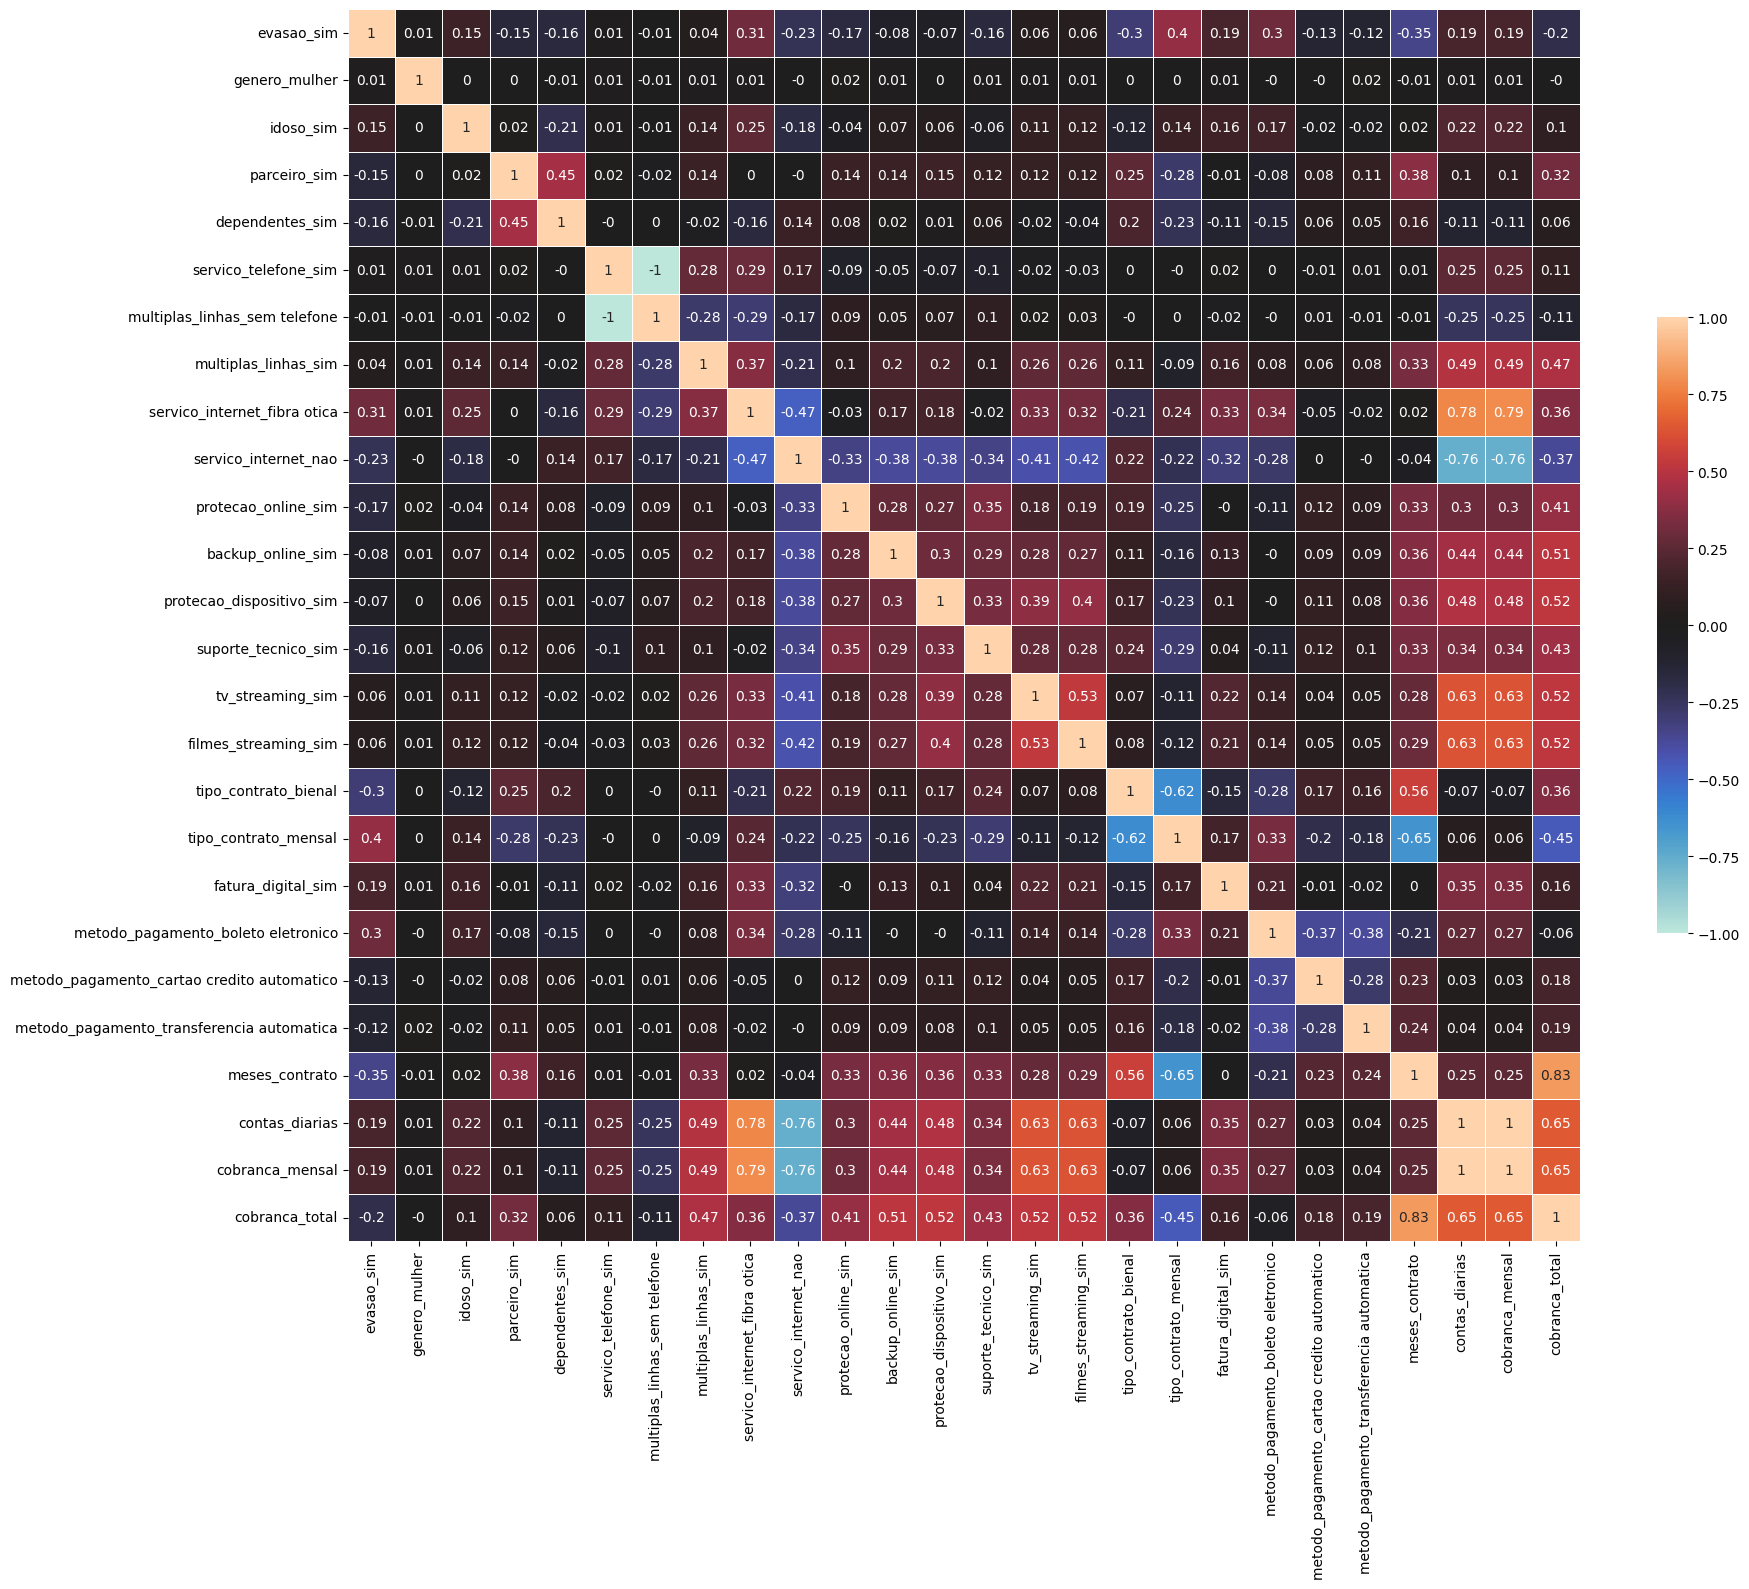

In [53]:
import numpy as np

corr = df_encoded.corr()

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

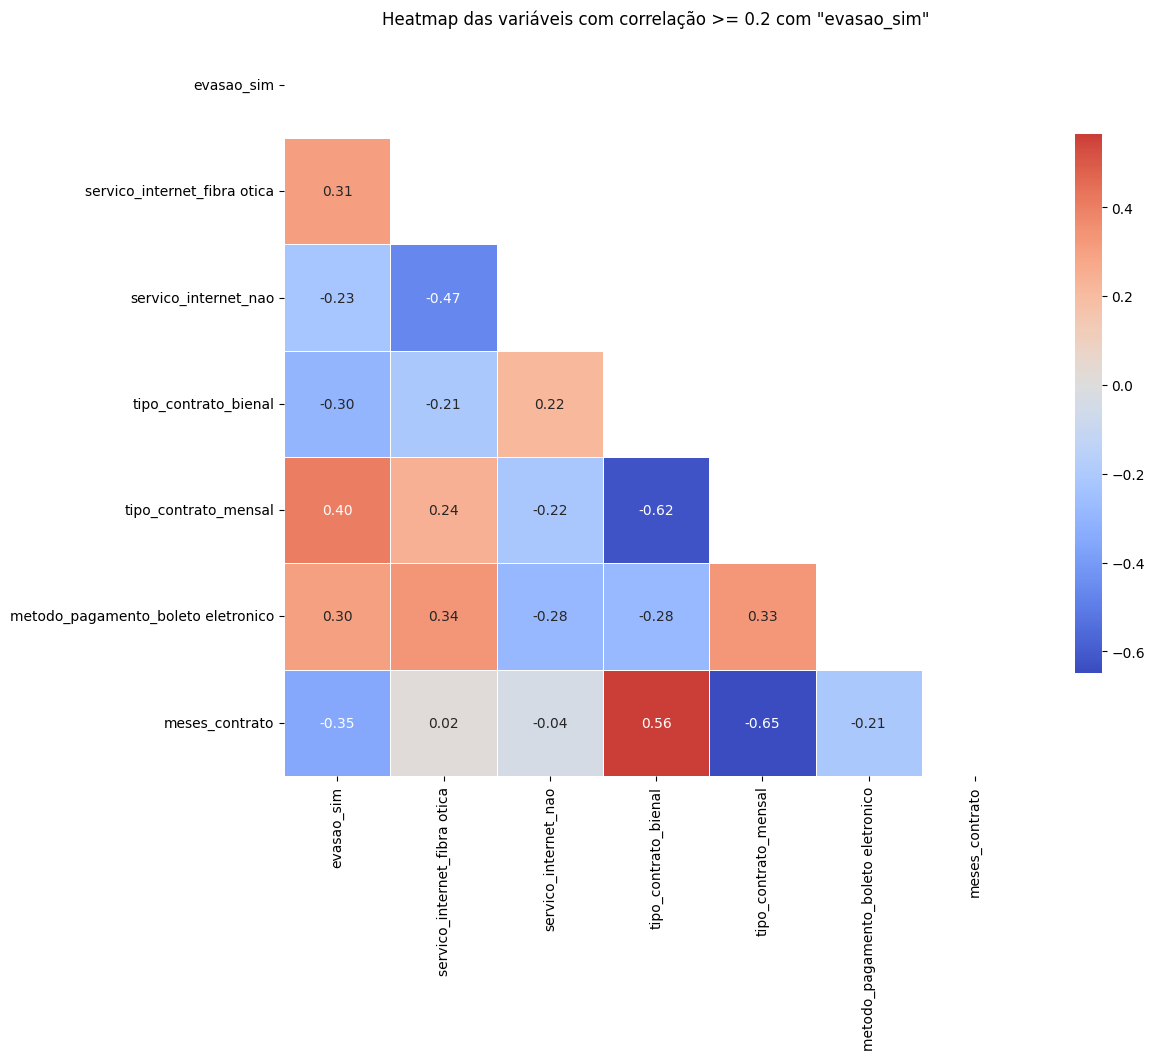

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

target_var = 'evasao_sim' # Variável alvo


limiar = 0.2 # Limiar mínimo de correlação absoluta para seleção

# Cria uma lista com as variáveis relevantes usando a correlação como filtro
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Garantir que a variável alvo está na lista (se não estiver, adiciona)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Criar uma matriz de correlação somente com as variáveis selecionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Gerar uma máscara para esconder o triângulo superior da matriz (incluindo diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Plotar o heatmap com a máscara aplicada para melhor visualização
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

**Correlação com `evasao_sim` (variável alvo)**

| Variável                                 | Correlação com evasao_sim | Interpretação                                                                                                   |
| ---------------------------------------- | ------------------------- | --------------------------------------------------------------------------------------------------------------- |
| `servico_internet_fibra otica`   | **+0.31**                 | Clientes com fibra ótica têm **maior chance de churn**. Pode estar relacionado ao custo ou à competitividade.   |
| `metodo_pagamento_boleto eletronico` | **+0.30**                 | Pagamentos por boleto eletrônico estão associados a mais churn — talvez por perfil de cliente menos fidelizado. |
| `tipo_contrato_bienal`              | **-0.30**                 | Contratos de 2 anos reduzem o churn (clientes mais engajados ou com benefícios)                                 |
| `meses_contrato`                        | **-0.35**                 | Quanto maior o tempo como cliente, menor a chance de churn — esperado                                           |
| `servico_internet_nao`            | **-0.23**                 | Quem **não usa internet** tem menor chance de churn — possivelmente perfis mais estáveis (idosos, menos digitais)   |





### 🔍 Análise de Multicolinearidade

A Análise de Multicolinearidade será executada pois pretende-se usar um modelo de Regressão Logística.

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [56]:
# Selecionar as variáveis independentes
X = df_encoded.drop(columns=['evasao_sim'])

In [57]:
# Adicionar constante (intercepto)
X_const = add_constant(X)

In [58]:
X_const = X_const.astype(float)

# Calcular o VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Exibir os resultados
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
6,multiplas_linhas_sem telefone,inf
5,servico_telefone_sim,inf
24,cobranca_mensal,992.623632
8,servico_internet_fibra otica,148.504277
23,contas_diarias,133.792125
9,servico_internet_nao,104.217179
15,filmes_streaming_sim,24.158588
14,tv_streaming_sim,24.080021
25,cobranca_total,10.871350
22,meses_contrato,7.613525


**FIV REFEITA**

In [59]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Copiar X_const para não modificar o original
X_filtered = X_const.copy()
X_filtered = X_filtered.astype(float)

# Remover variáveis com alta multicolinearidade
cols_to_drop = [
    "servico_telefone_sim",
    "multiplas_linhas_sem telefone",
    "contas_diarias"
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# Recalcular o VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# Exibir os resultados
display(vif_data.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,88.035950
21,cobranca_mensal,35.340431
22,cobranca_total,10.810996
6,servico_internet_fibra otica,10.115348
20,meses_contrato,7.584286
7,servico_internet_nao,4.845675
12,tv_streaming_sim,2.454781
13,filmes_streaming_sim,2.434019
15,tipo_contrato_mensal,2.430095
17,metodo_pagamento_boleto eletronico,2.183556


**FIV FINAL**

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Remover a variável cobranca_total
X_final = X_filtered.drop(columns=["cobranca_mensal"])

# Recalcular o VIF
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# Exibir os resultados ordenados
display(vif_data_final.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,22.465945
21,cobranca_total,10.258987
20,meses_contrato,7.212462
7,servico_internet_nao,2.491198
15,tipo_contrato_mensal,2.427772
6,servico_internet_fibra otica,2.262753
17,metodo_pagamento_boleto eletronico,2.183556
14,tipo_contrato_bienal,1.886267
19,metodo_pagamento_transferencia automatica,1.804871
18,metodo_pagamento_cartao credito automatico,1.777222


### Balanceamento dos dados

In [61]:
#df_encoded['evasao_sim'].value_counts(normalize=True)

,proportion
evasao_sim,
0.0,0.734215
1.0,0.265785


Verificou-se que os dados estão desbalanceados numa proporção de aproximadamente 70% para não evasão.

Foi feito balanceamento dos dados usando oversampling com SMOTE.

In [62]:
#from imblearn.over_sampling import SMOTE

#X = df_encoded.drop(columns=['evasao_sim'])
#y = df_encoded['evasao_sim']

# Inicializa o SMOTE
#smote = SMOTE(random_state=42)

# Aplica o SMOTE
#X_resampled, y_resampled = smote.fit_resample(X, y)

In [63]:
#y_resampled.value_counts(normalize=True)

,proportion
evasao_sim,
0.0,0.5
1.0,0.5


## ✔️ Normalização/Padronização

🔄 Normalização dos dados

A normalização é uma etapa comum no pré-processamento de dados, especialmente importante para algoritmos que são **sensíveis à escala dos atributos**, como:

* KNN (K-Nearest Neighbors)
* Redes Neurais
* Regressão Logística
* SVM (Support Vector Machine)

Modelos baseados em árvores (como Decision Tree, Random Forest e XGBoost) **não exigem normalização**, pois não dependem da escala dos dados para construir suas regras de decisão.

Neste projeto, aplicaremos a **normalização Min-Max**, que transforma os valores para o intervalo **\[0, 1]**. Isso ajuda a garantir que todas as variáveis numéricas contribuam de forma equilibrada para o modelo.

```python
from sklearn.preprocessing import MinMaxScaler

# Selecionando apenas colunas numéricas (exceto a variável target, se já estiver separada)
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

# Inicializando o scaler
scaler = MinMaxScaler()

# Aplicando a normalização
dados[colunas_numericas] = scaler.fit_transform(dados[colunas_numericas])

# Exibindo os dados normalizados
dados.head()
```



## 🤖 Modelos Preditivos

Importação da bibliotecas

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

 Separar features e target

In [66]:
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

KeyError: "['Churn_Yes'] not found in axis"

Dividir treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


**Normalizar**

- Vamos treinar Regressão Logística, que se beneficia da normalização. Por isso, normalizei os dados para esse modelo.

- Já o Random Forest não precisa da normalização — mas como você está usando os mesmos dados para ambos os modelos, o normalizei para manter consistência e simplicidade.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Balancear treino com SMOTE**

Pois ja verificamos anterioemente que a proporção do churn estava desbalanceada

In [ ]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

**Regressão Logística**

In [ ]:
# Instanciar e treinar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


**Random Forest**

In [ ]:
# Instanciar e treinar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))